# Econophysics Assignment 1
Rosa Kurtz

the average value of S at T is:  297.9975805478515
call value at  180  days is:  192.9975805478515 $
put value at  180  days is:  0.0 $


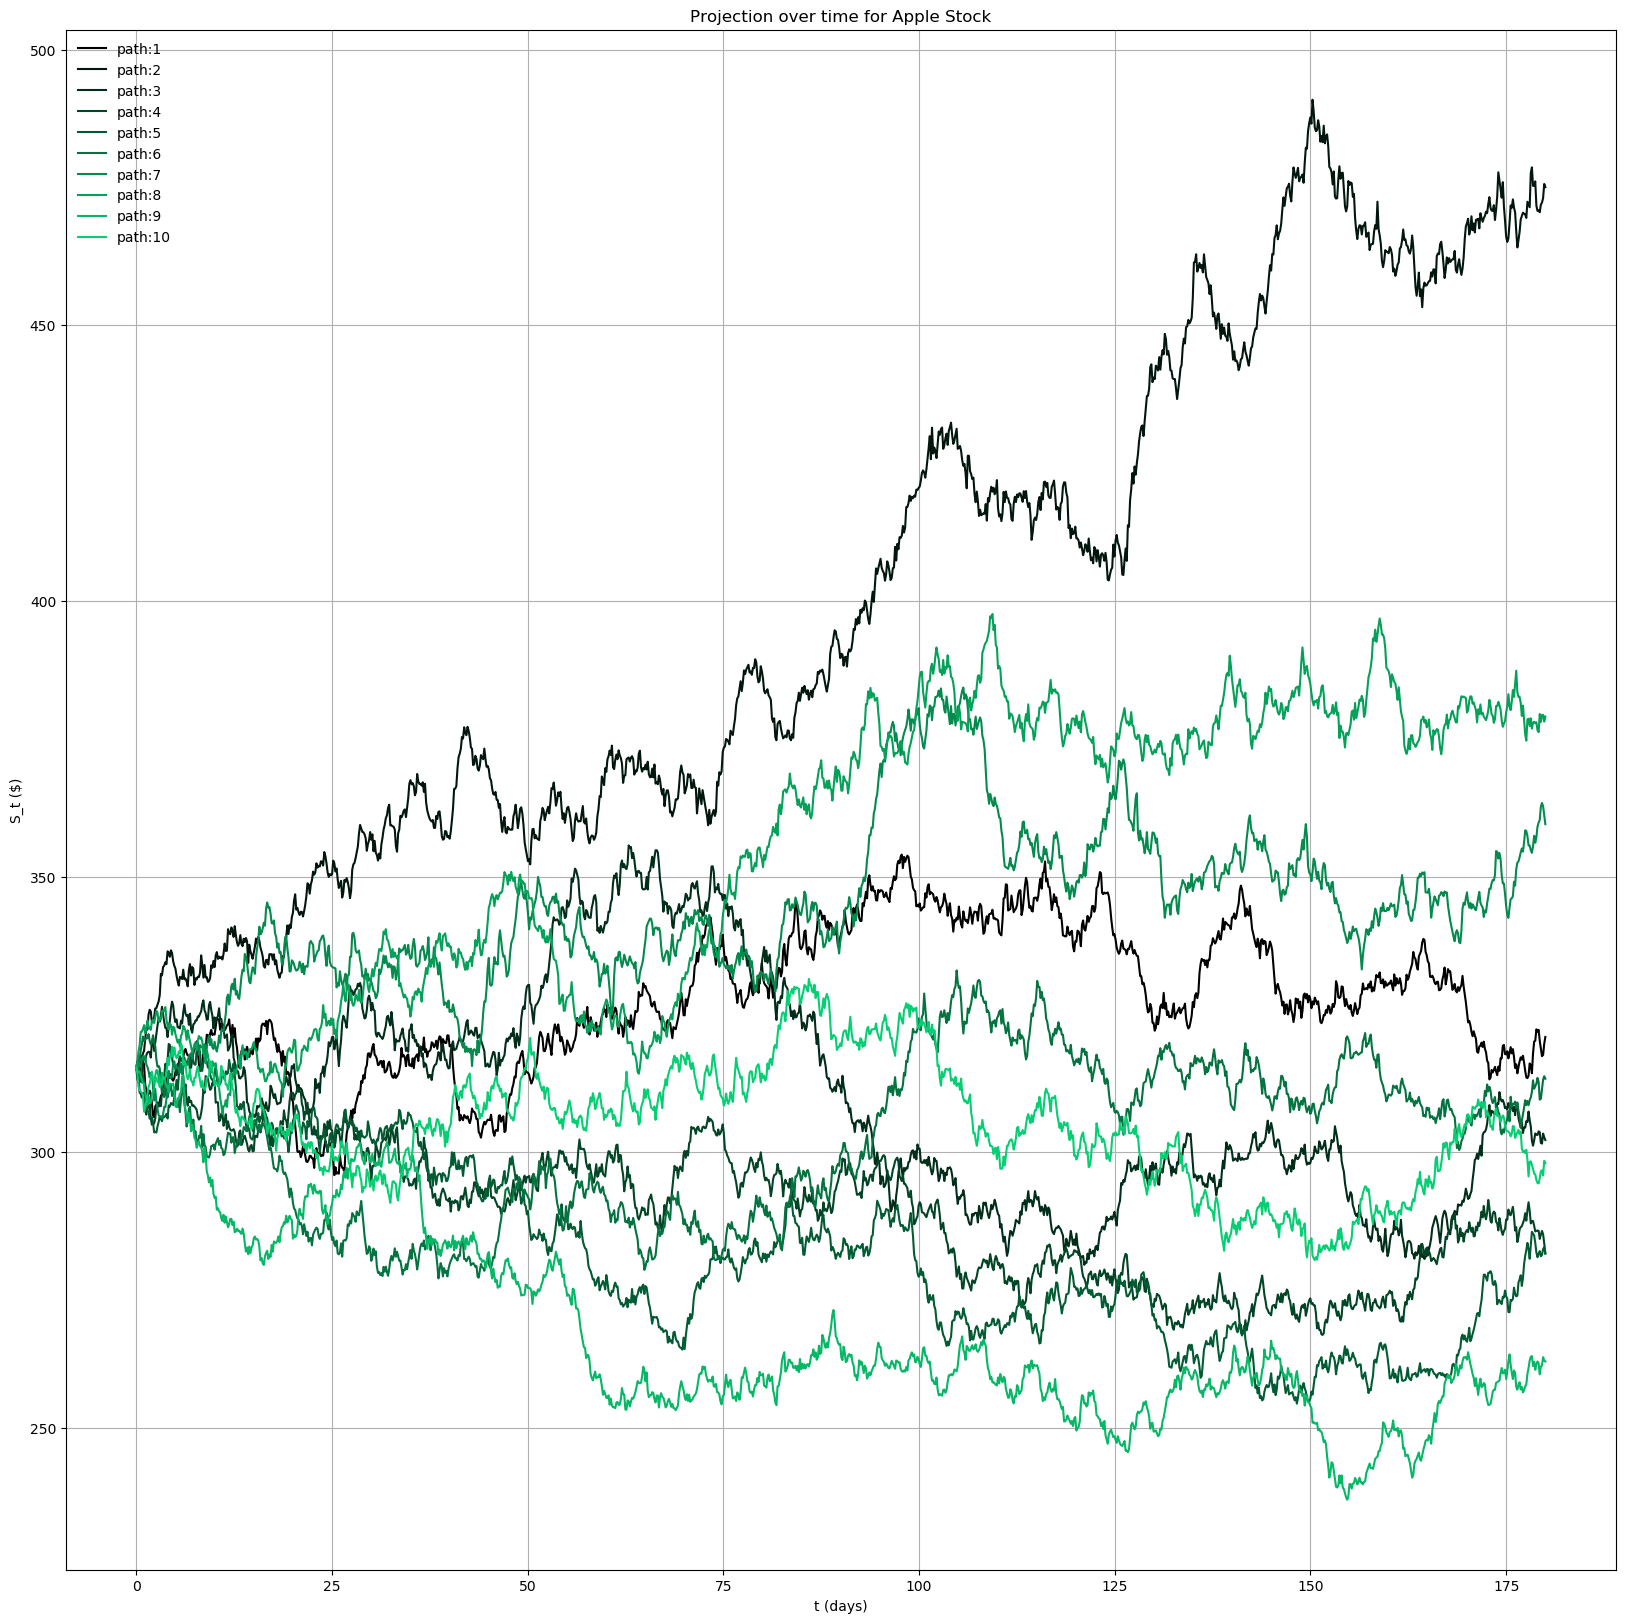

In [4]:
# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import exp, log, sqrt, pi, sin, cos

# SciPy
import scipy.optimize as optimize

# Settings
mpl.style.use('default')
mpl.rcParams['legend.frameon'] = False


S0 = 315.36 

r = .01 / (180*2) #annual
sigma = 0.01136925
T = 180 # in days (and remember 1 hr = 1/7 of a day)
S = 0
X = 105 
N = 0
n = 10 # number of paths

dt=1/7
t = np.linspace(0, T, int(T/dt)) 
S_Ts = np.zeros([n, int(T/dt)], dtype=float)

def follow_path():
    S = np.zeros([int(T/dt)], dtype=float)
    S[0] = S0
    for i in range(1, int(T/dt)):
        Eps = np.random.normal(0,1)
        S[i] = S[i-1] * exp((r - (sigma**2) / 2) * dt + sigma * Eps * sqrt(dt))   
    return S

def fill_and_avg(n):
    avg = 0
    for i in range(0,n):
        S_Ts[i] = follow_path()
    for a in range(0,n):
        avg = avg + S_Ts[i, -1]/n
    return avg


def call(S_t, X, t):
    c = exp(-r * (T-t)) * np.mean(max(S_t - X, 0))
    return c
   
def put(S_t, X, t):
    p = exp(-r * (T-t)) * np.mean(max(X - S_t, 0))
    return p

avg = fill_and_avg(n)

print("the average value of S at T is: ", avg)
print("call value at ", T, " days is: ", call(avg, X, T), "$")
print("put value at ", T, " days is: ", put(avg, X, T), "$")

fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(111)
for y in range(0,n):
    k = ax1.plot(t,  S_Ts[y],  'C0-', label = 'path:' + str(y+1), color = (y/n*.02, y/n*.9, y/n*.5))
    plt.legend(loc=0)
plt.ylabel('S_t ($)')
plt.xlabel('t (days)')
plt.title('Projection over time for Apple Stock')
plt.grid('minor','both')

plt.show()

